In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [10]:
%cd /glade/scratch/gmarques/OM4_025
%ls

/glade/scratch/gmarques/OM4_025
data_table         MOM_parameter_doc.all        SIS_fast.available_diags
diag_table         MOM_parameter_doc.debugging  SIS_input
field_table        MOM_parameter_doc.layout     SIS_layout
INPUT/             MOM_parameter_doc.short      SIS_override
input.nml          MOM_saltrestore              SIS_parameter_doc.all
MOM_input          preprocessing/               SIS_parameter_doc.debugging
MOM_layout         RESTART/                     SIS_parameter_doc.layout
MOM_override       run_job.txt                  SIS_parameter_doc.short
MOM_override.CESM  SIS.available_diags


In [6]:
print('done')

done


In [12]:
grid=xr.open_dataset('20090101.ocean_static.nc')
lon=grid['geolon'].values; lat=grid['geolat'].values
ds = xr.open_dataset('20090101.ocean_month.nc')
Rd_dx=ds['Rd_dx'][-1,:,:].values

lon[np.isnan(lon)]=0.0
lat[np.isnan(lat)]=0.0
#Rd_dx[np.isnan(lon)]=0.0; Rd_dx[np.isnan(lat)]=0.0

In [4]:
print(Rd_dx.shape)
print(lon.shape)
print(lat.shape)

(1080, 1440)
(1080, 1440)
(1080, 1440)


In [5]:
#print(ds)

In [6]:
np.max(lon)

59.99949

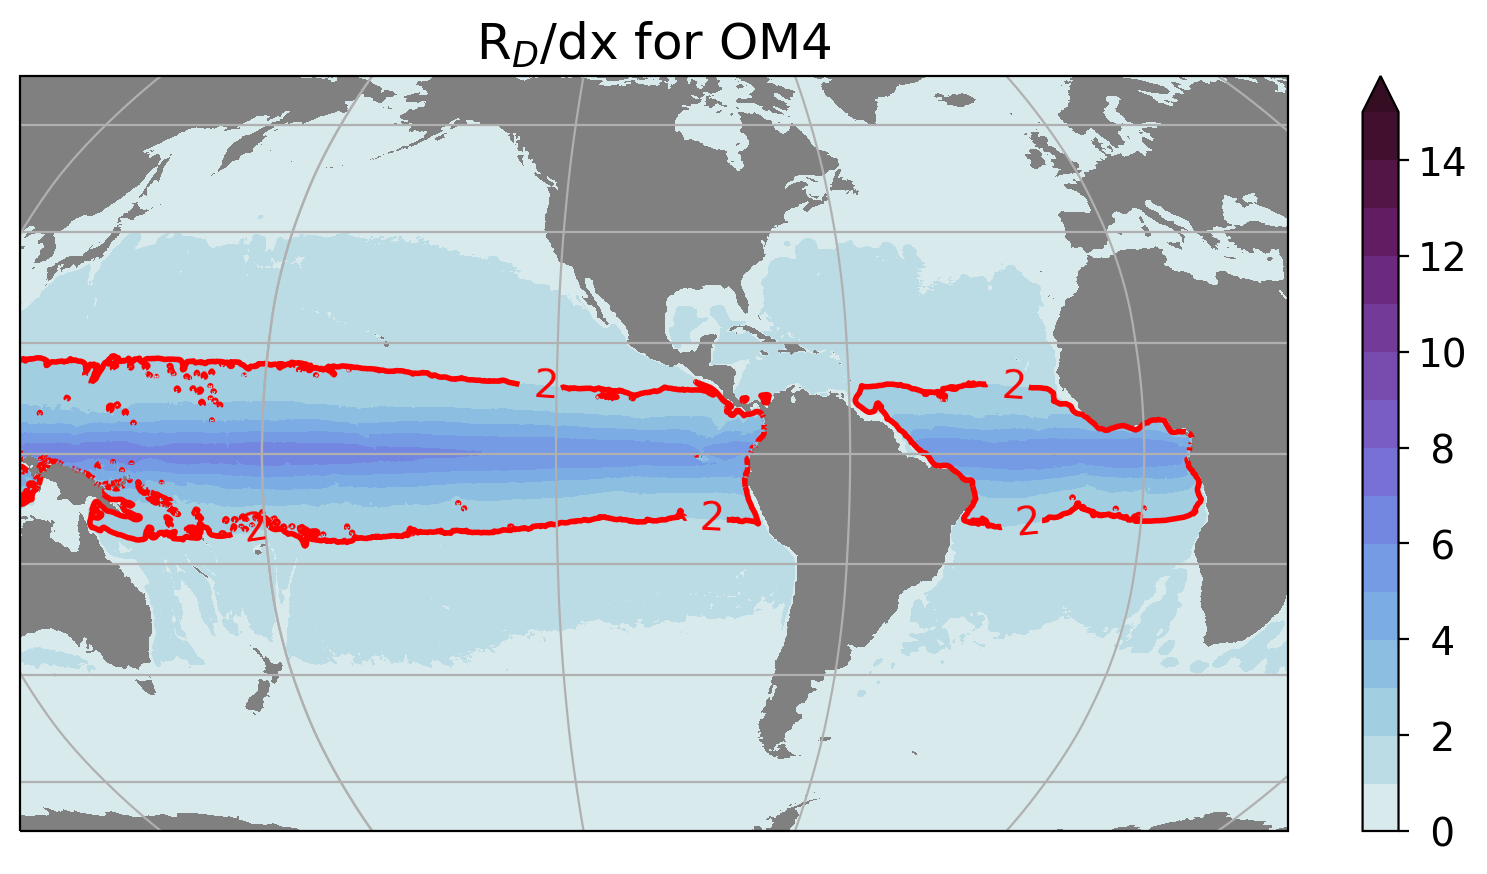

In [11]:
fig = plt.figure(figsize=(12, 5), dpi= 200, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-100)) #-140 is default
ax.set_extent([-400,-40,-70, 70],ccrs.PlateCarree())

levels=np.linspace(0,15,16)
plt.contourf(lon,lat,Rd_dx,levels=levels,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,extend='max');


cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%2.1d'); cbar.ax.tick_params(labelsize=14);
CS=plt.contour(lon, lat,Rd_dx,levels = [2],transform=ccrs.PlateCarree(),
                 colors=('r',),linestyles=('-',),linewidths=(2,))
ax.clabel(CS, fmt = '%2.1d', colors = 'r', fontsize=14)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('R$_D$/dx for OM4',fontsize=18) #positive into ocean
ax.background_patch.set_facecolor('grey')

In [14]:
sum(lon)

<xarray.DataArray 'geolon' (xh: 1440)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03